In [2]:
import pandas as pd 
import matplotlib.pyplot as plt 


In [1]:


import os
import sys
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt


In [34]:
dist = []
list_=[]
path = "/Users/matthewchuang/Documents/GitHub/algo_test/datas/20210106/minute"

df = pd.read_csv(path+"/AACQ.csv")
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)
df = df.close.to_frame()
df = df.rename(columns={"close":"AACQ"})
df.head()

,AACQ
date,
2020-11-18 14:30:00,9.7800
2020-11-18 15:06:00,9.7501
2020-11-18 15:26:00,9.7750
2020-11-18 15:54:00,9.7800
2020-11-18 16:14:00,9.7600


In [53]:
def find_file_name(string):
    string = str(string)
    k=0
    for i in range(len(string)):
        if string[-i-1] == "/":
            return string[-i:-4]

In [58]:
import re

for file in Path(path).iterdir():
    if file.is_file():
        file_name = find_file_name(file)
        temp = pd.read_csv(file)
        temp['date'] = pd.to_datetime(temp['date'])
        temp.set_index('date', inplace=True)
        temp = temp.close.to_frame()
        temp = temp.rename(columns={"close":file_name})
        df = pd.concat([df, temp], axis=1)


In [59]:
df1 = df.copy()
df1.head(6)

,AACQ,CSCO,HLNE,SBGI,UFCS,KNDI,AEIS,UAL,TROW,ISRG,...,TELL,RGP,PLXS,NWL,QTNT,UXIN,ABCL,OLLI,ROKU,ARGX
date,,,,,,,,,,,,,,,,,,,,,
2020-10-09 13:30:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-10-13 13:30:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-10-14 13:30:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-10-15 13:30:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-10-21 13:30:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-10-22 13:30:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [65]:
df2 = df1.iloc[22:,:].fillna(method="bfill")
df2.shape

(6062, 1559)

In [66]:
def find_Return(price):
    ret = (price - price.shift(1))/price
    ret = ret.drop(ret.index[0])
    # fill the nan values with 0
    ret = ret.fillna(value = 0)
    return ret

In [71]:
from sklearn.cluster import DBSCAN
import numpy as np
ret = find_Return(df2)
ret
clustering = DBSCAN(min_samples=2,eps=0.33).fit(ret.T)
print(clustering.labels_)
type(clustering.labels_)


[0 0 0 ... 0 0 0]


numpy.ndarray

In [81]:
best = -np.inf
best_ = 0
for i in [0.01* j for j in range(1,400)]:
    print(i)
    clustering = DBSCAN(min_samples=2,eps=i).fit(ret.T)
    if sum(clustering.labels_) > best:
        best_=i
        best = sum(clustering.labels_) 
print(best)
clustering = DBSCAN(min_samples=2,eps=best_).fit(ret.T)
print(clustering.labels_)

0.01
0.02
0.03
0.04
0.05
0.06
0.07
0.08
0.09
0.1
0.11
0.12
0.13
0.14
0.15
0.16
0.17
0.18
0.19
0.2
0.21
0.22
0.23
0.24
0.25
0.26
0.27
0.28
0.29
0.3
0.31
0.32
0.33
0.34
0.35000000000000003
0.36
0.37
0.38
0.39
0.4
0.41000000000000003
0.42
0.43
0.44
0.45
0.46
0.47000000000000003
0.48
0.49
0.5
0.51
0.52
0.53
0.54
0.55
0.56
0.5700000000000001
0.58
0.59
0.6
0.61
0.62
0.63
0.64
0.65
0.66
0.67
0.68
0.6900000000000001
0.7000000000000001
0.71
0.72
0.73
0.74
0.75
0.76
0.77
0.78
0.79
0.8
0.81
0.8200000000000001
0.8300000000000001
0.84
0.85
0.86
0.87
0.88
0.89
0.9
0.91
0.92
0.93
0.9400000000000001
0.9500000000000001
0.96
0.97
0.98
0.99
1.0
1.01
1.02
1.03
1.04
1.05
1.06
1.07
1.08
1.09
1.1
1.11
1.12
1.1300000000000001
1.1400000000000001
1.1500000000000001
1.16
1.17
1.18
1.19
1.2
1.21
1.22
1.23
1.24
1.25
1.26
1.27
1.28
1.29
1.3
1.31
1.32
1.33
1.34
1.35
1.36
1.37
1.3800000000000001
1.3900000000000001
1.4000000000000001
1.41
1.42
1.43
1.44
1.45
1.46
1.47
1.48
1.49
1.5
1.51
1.52
1.53
1.54
1.55
1.56
1.57
1

In [83]:
clustering = DBSCAN(min_samples=2,eps=0.06).fit(ret.T)
print(clustering.labels_)

[ 0  1  2 ... -1 -1 -1]


(array([1463.,   10.,   10.,   10.,    9.,   10.,   10.,   10.,   17.,
          10.]),
 array([-1. ,  3.8,  8.6, 13.4, 18.2, 23. , 27.8, 32.6, 37.4, 42.2, 47. ]),
 <BarContainer object of 10 artists>)

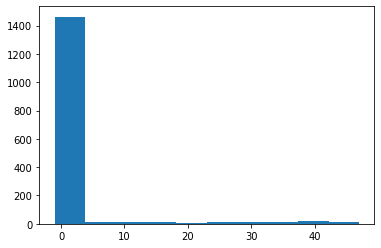

In [86]:
plt.hist(clustering.labels_)

In [87]:
name =[0 for i in range(49)]
index__ =[0 for i in range(49)]
for i in range(len(clustering.labels_)):
    
    if clustering.labels_[i] == -1:
        pass
    else:
        if isinstance(name[clustering.labels_[i]],int):
            name[clustering.labels_[i]]=[ret.columns[i]]
            index__[clustering.labels_[i]]=[i]
        else:
            name[clustering.labels_[i]].append(ret.columns[i])
            index__[clustering.labels_[i]].append(i)
ret.columns[0]
name


[['AACQ', 'AACQ'],
 ['CSCO', 'CSCO'],
 ['HLNE', 'HLNE'],
 ['SBGI', 'SBGI'],
 ['UFCS', 'UFCS'],
 ['KNDI', 'KNDI'],
 ['AEIS', 'AEIS'],
 ['UAL', 'UAL'],
 ['TROW', 'TROW'],
 ['ISRG', 'ISRG'],
 ['GDRX', 'GDRX'],
 ['TLRY', 'TLRY'],
 ['LECO', 'LECO'],
 ['VCYT', 'VCYT'],
 ['USAT', 'USAT'],
 ['BLDP', 'BLDP'],
 ['SIBN', 'SIBN'],
 ['PDD', 'PDD'],
 ['BBIO', 'BBIO'],
 ['LBTYK', 'LBTYK', 'LBTYA'],
 ['IMAB', 'IMAB'],
 ['MGEE', 'MGEE'],
 ['AMSC', 'AMSC'],
 ['XLRN', 'XLRN'],
 ['LOVE', 'LOVE'],
 ['VIR', 'VIR'],
 ['SVC', 'SVC'],
 ['HAFC', 'HAFC'],
 ['BTAI', 'BTAI'],
 ['VIE', 'VIE'],
 ['ADTN', 'ADTN'],
 ['RLAY', 'RLAY'],
 ['DRRX', 'DRRX'],
 ['NBIX', 'NBIX'],
 ['VRTX', 'VRTX'],
 ['SSPK', 'SSPK'],
 ['GGAL', 'GGAL'],
 ['GILD', 'GILD'],
 ['WW', 'WW'],
 ['MDB', 'MDB'],
 ['FOX', 'FOXA'],
 ['ACIA', 'PEP', 'MDLZ', 'WTRE', 'CBPO', 'UROV', 'EIGI', 'VRTU'],
 ['LNT', 'XEL', 'AEP'],
 ['ADI', 'MXIM'],
 ['NWS', 'NWSA'],
 ['AMD', 'XLNX'],
 ['DISCK', 'DISCA'],
 ['GOOGL', 'GOOG'],
 0]